# Predicting World Happiness: Solve an ML Problem 

In [ ]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns


* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`

#### Load a Data Set and Save it as a Pandas DataFrame


In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


- I have chosen the World Happiness Report (WHR) data set
- The label I will be predicting is the "Life Ladder" score, which represents the overall happiness level of people in each country.
- This is a supervised learning problem. Since the label is a continuous numerical value, this problem is a regression problem
- The initial features that will be used for the model include:
Log GDP per capita, 
Social support, 
Healthy life expectancy at birth, 
Freedom to make life choices, 
Generosity, 
Perceptions of corruption, 
Positive affect, 
Negative affect, 
Confidence in the national government, 
Democratic Quality, 
Delivery Quality, 
GINI index.
- Understanding the factors that contribute to happiness at a national level can provide valuable insights for governments, NGOs, and policymakers. By predicting the "Life Ladder" score based on various socio-economic indicators, countries can identify key areas to improve to enhance the well-being of their citizens. Additionally, organizations can use this information to tailor their services and interventions more effectively in different regions. Companies interested in Corporate Social Responsibility (CSR) initiatives may also find this information useful for aligning their programs with the factors that most significantly impact happiness.

In [3]:
# Inspect data using different techniques

# Display the first few rows of the data
df.head()

# Check the data types of each column
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

# Summary statistics for numerical features
print(df.describe())

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

In [8]:
# Handling Missing Values by filling with mean
df.fillna(df.mean(), inplace=True)

print("\nMissing Values After Filling:")
print(df.isnull().sum())


Missing Values After Filling:
country                                                     0
year                                                        0
Life Ladder                                                 0
Log GDP per capita                                          0
Social support                                              0
Healthy life expectancy at birth                            0
Freedom to make life choices                                0
Generosity                                                  0
Perceptions of corruption                                   0
Positive affect                                             0
Negative affect                                             0
Confidence in national government                           0
Democratic Quality                                          0
Delivery Quality                                            0
Standard deviation of ladder by country-year                0
Standard deviation/Mean of ladder by co

/tmp/ipykernel_1549/2404599378.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


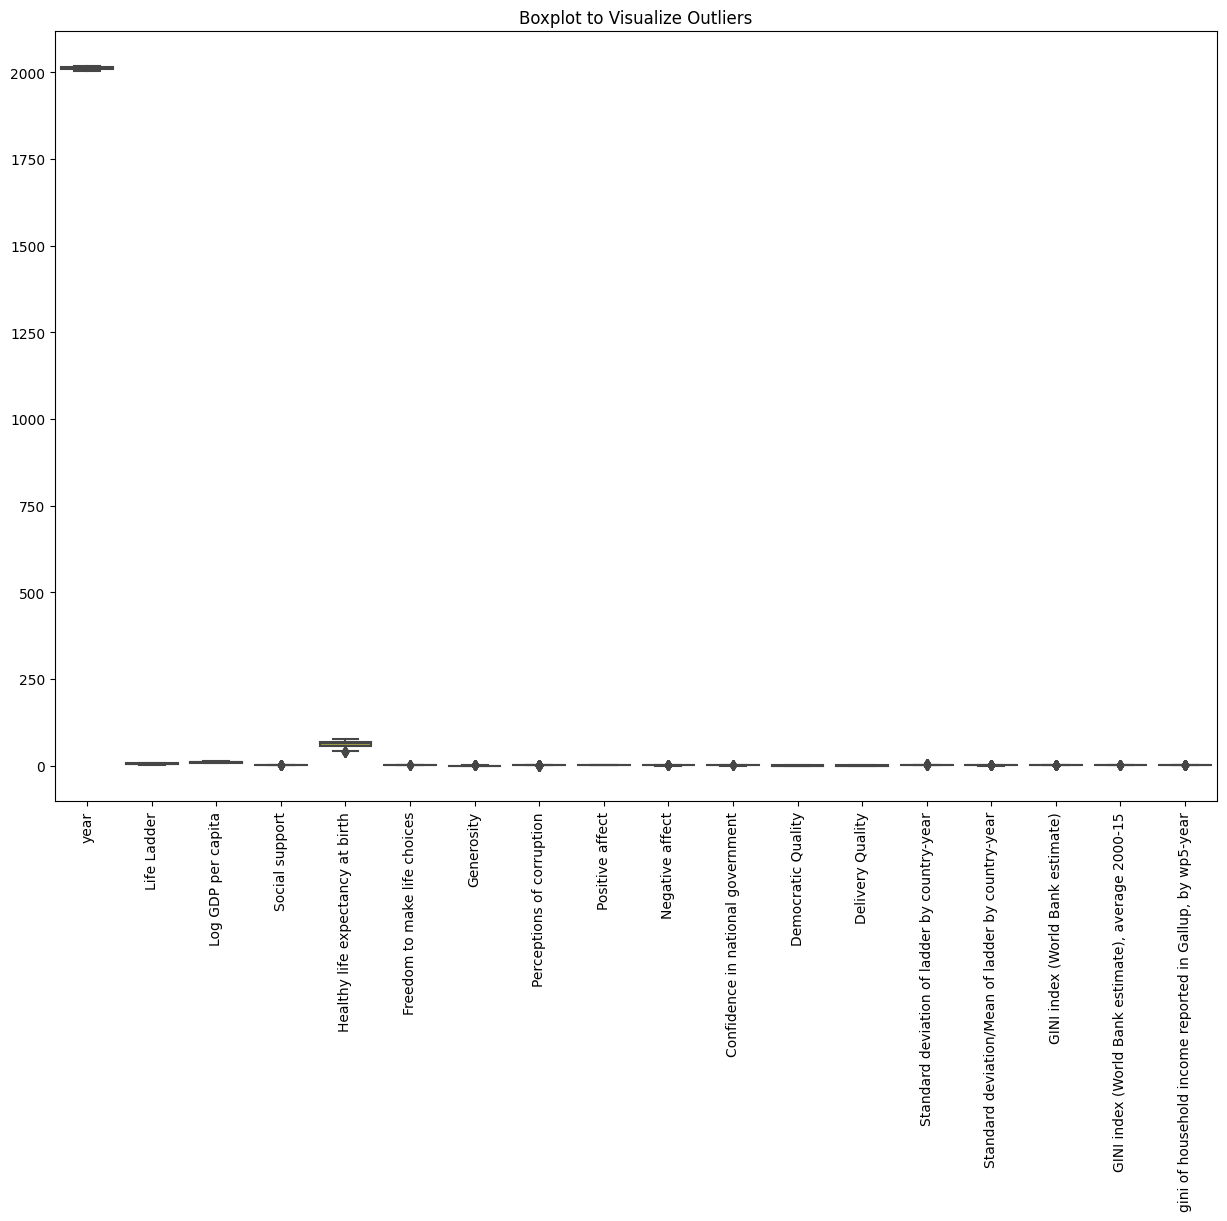

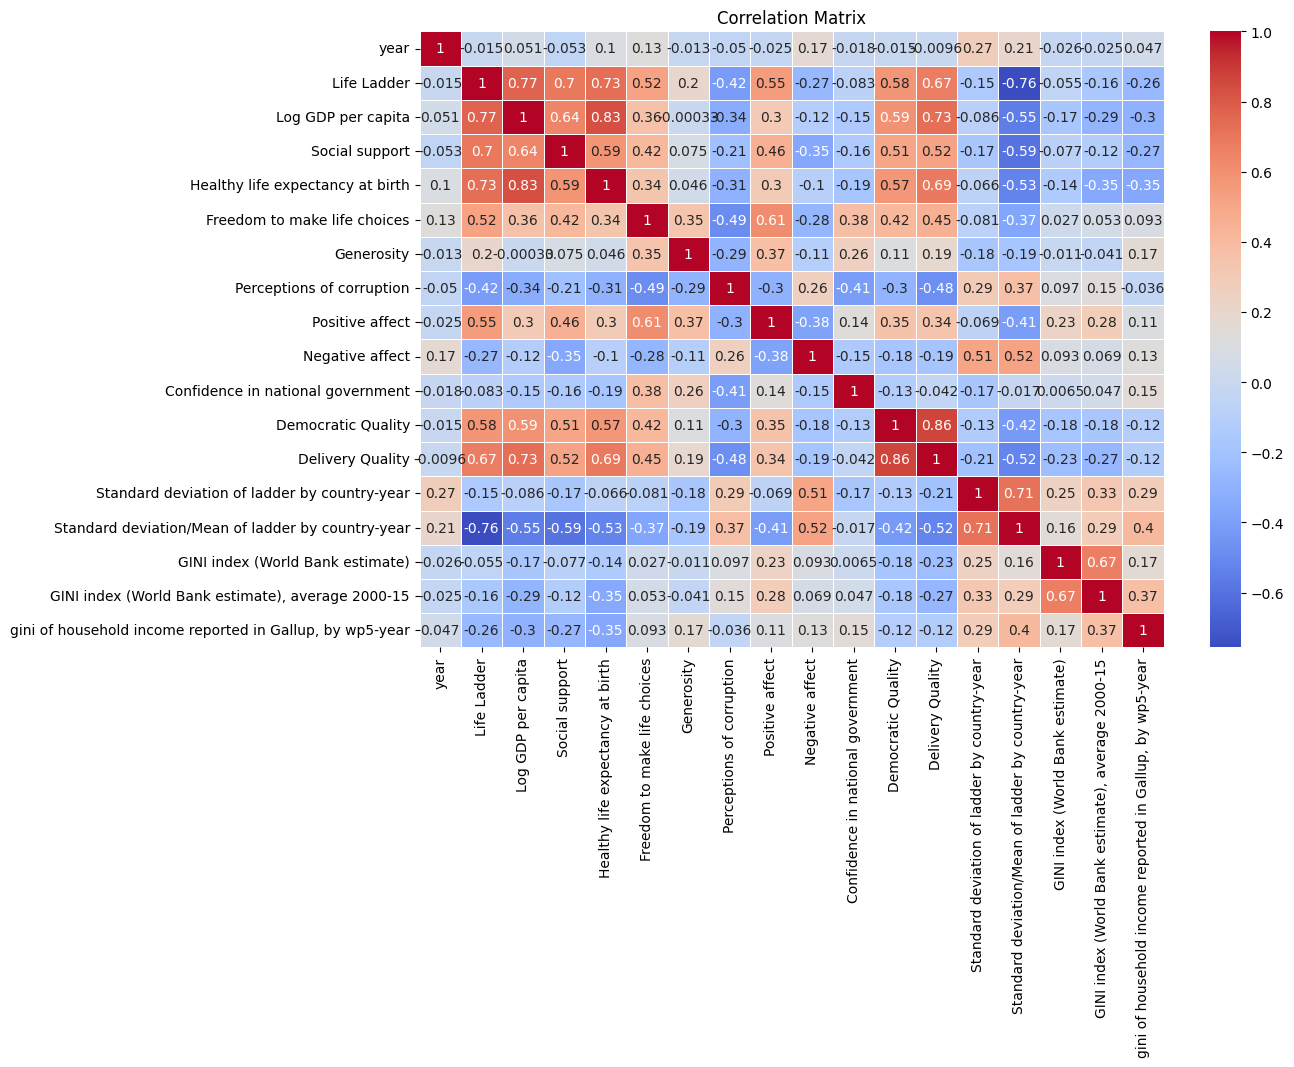

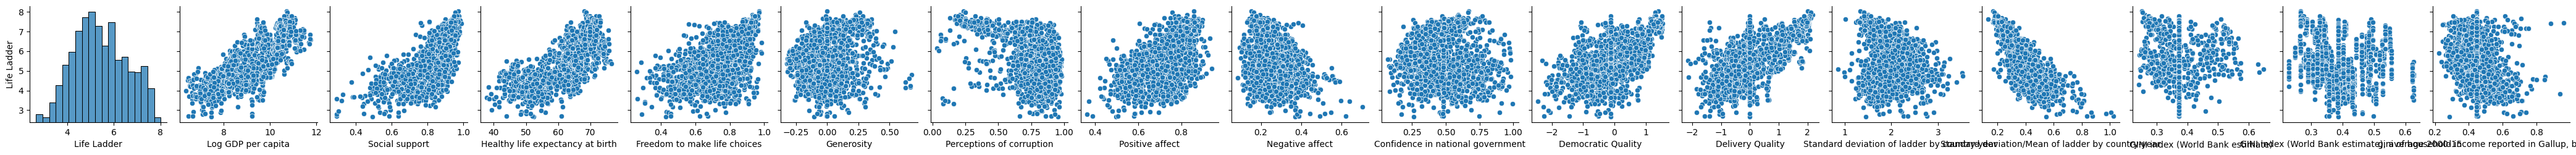

In [9]:
# Visualize outliers using boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.title("Boxplot to Visualize Outliers")
plt.show()

# Correlation matrix to understand relationships
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

# Pairplot to visualize relationships between features and the target variable 'Life Ladder'
sns.pairplot(df, y_vars='Life Ladder', x_vars=df.columns[2:])
plt.show()

In [ ]:
# Feature Scaling: Scaling numerical features for modeling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=[np.number])), columns=df.select_dtypes(include=[np.number]).columns)

# Verify scaling
print("\nFirst few rows of the scaled data:")
print(df_scaled.head())


First few rows of the scaled data:
       year  Life Ladder  Log GDP per capita  Social support  \
0 -1.117604    -1.525966           -1.748915       -3.029489   
1 -0.825094    -0.920796           -1.608210       -2.174128   
2 -0.532585    -0.602588           -1.563178       -2.285487   
3 -0.240075    -1.429479           -1.538983       -2.436720   
4  0.052434    -1.473008           -1.451963       -2.440648   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         -1.643350                     -0.075416    1.136674   
1                         -1.591080                     -0.347754    1.272988   
2                         -1.542621                     -0.894744    0.860297   
3                         -1.497463                     -1.618511    1.096082   
4                         -1.454368                     -1.375230    1.545334   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.7112

In [12]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split

X = df_scaled.drop(columns=['Life Ladder'])
y = df_scaled['Life Ladder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Model selection and fitting using Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nModel Performance:')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Model Performance:
Mean Squared Error: 0.06524654076571244
R-squared: 0.9366265133358299


In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Load the data
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
df = pd.read_csv(WHRDataSet_filename)

# Drop columns with excessive missing data
df.drop(columns=['GINI index (World Bank estimate)', 
                 'GINI index (World Bank estimate), average 2000-15', 
                 'gini of household income reported in Gallup, by wp5-year'], inplace=True)

# Fill missing values with the mean
df.fillna(df.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.select_dtypes(include=[np.number])), 
                         columns=df.select_dtypes(include=[np.number]).columns)

# Split the data into training and testing sets
X = df_scaled.drop(columns=['Life Ladder'])
y = df_scaled['Life Ladder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = linear_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"Mean Squared Error: {mse_lr}")
print(f"R-squared: {r2_lr}")

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Performance:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

# Initialize and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regressor Performance:")
print(f"Mean Squared Error: {mse_gb}")
print(f"R-squared: {r2_gb}")

# Define hyperparameters for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search for Random Forest
grid_rf = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_rf.fit(X_train, y_train)

# Best parameters and model performance
print("\nBest parameters for Random Forest:", grid_rf.best_params_)
y_pred_grid_rf = grid_rf.predict(X_test)
mse_grid_rf = mean_squared_error(y_test, y_pred_grid_rf)
r2_grid_rf = r2_score(y_test, y_pred_grid_rf)

print(f"Random Forest Regressor Performance after Tuning:")
print(f"Mean Squared Error: {mse_grid_rf}")
print(f"R-squared: {r2_grid_rf}")

# Compare model performances
print("\nModel Comparison:")
print(f"Linear Regression - MSE: {mse_lr}, R-squared: {r2_lr}")
print(f"Random Forest - MSE: {mse_rf}, R-squared: {r2_rf}")
print(f"Gradient Boosting - MSE: {mse_gb}, R-squared: {r2_gb}")
print(f"Tuned Random Forest - MSE: {mse_grid_rf}, R-squared: {r2_grid_rf}")

# Final model selection based on performance metrics
final_model = grid_rf.best_estimator_
print(f"\nSelected Model: {final_model}")

/tmp/ipykernel_1549/626813038.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


Linear Regression Performance:
Mean Squared Error: 0.06482733979215186
R-squared: 0.9370336801679068

Random Forest Regressor Performance:
Mean Squared Error: 0.03835676878714322
R-squared: 0.9627443517053078

Gradient Boosting Regressor Performance:
Mean Squared Error: 0.029468860745836004
R-squared: 0.9713771116205148
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Regressor Performance after Tuning:
Mean Squared Error: 0.03743697439083832
R-squared: 0.9636377412585919

Model Comparison:
Linear Regression - MSE: 0.06482733979215186, R-squared: 0.9370336801679068
Random Forest - MSE: 0.03835676878714322, R-squared: 0.9627443517053078
Gradient Boosting - MSE: 0.029468860745836004, R-squared: 0.9713771116205148
Tuned Random Forest - MSE: 0.03743697439083832, R-squared: 0.9636377412585919

Selected Model: RandomForestRegressor(n_estimato